In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
# import scipy.signal as sp
# import numpy.linalg as nplin

from scipy.integrate import odeint

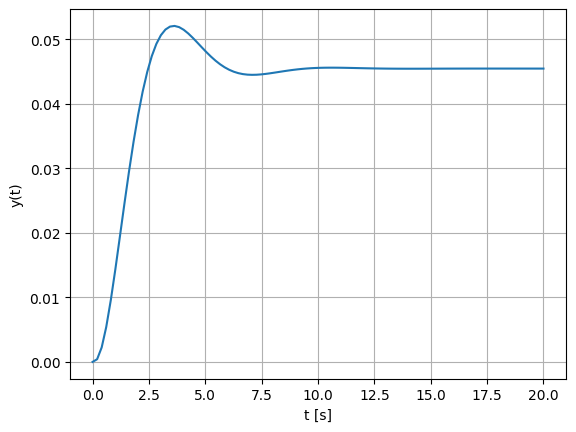

In [84]:
def model(x,t):
  R1 = 2
  R2 = 5
  C1 = 0.5
  L1 = 2
  L2 = 0.5

  A = np.array([[-R1/L1, 0, -1/L1], [0, -R2/L2, 1/L1], [1/C1, -1/C1, 0]])
  B = np.array([[1/L1], [0], [0]])
  C = np.array([[0, 1, 0]])
  D = 0

  u = 1

  dxdt = A @ x + (B * u).flatten()
  return dxdt

x = np.array([0, 0, 0])
t = np.linspace(0, 20, 100)

x_sol = odeint(model, x, t)

C = np.array([0, 1, 0])
y_sol = x_sol @ C

plt.plot(t, y_sol)
plt.xlabel('t [s]')
plt.ylabel('y(t)')
plt.grid(True)
plt.show()

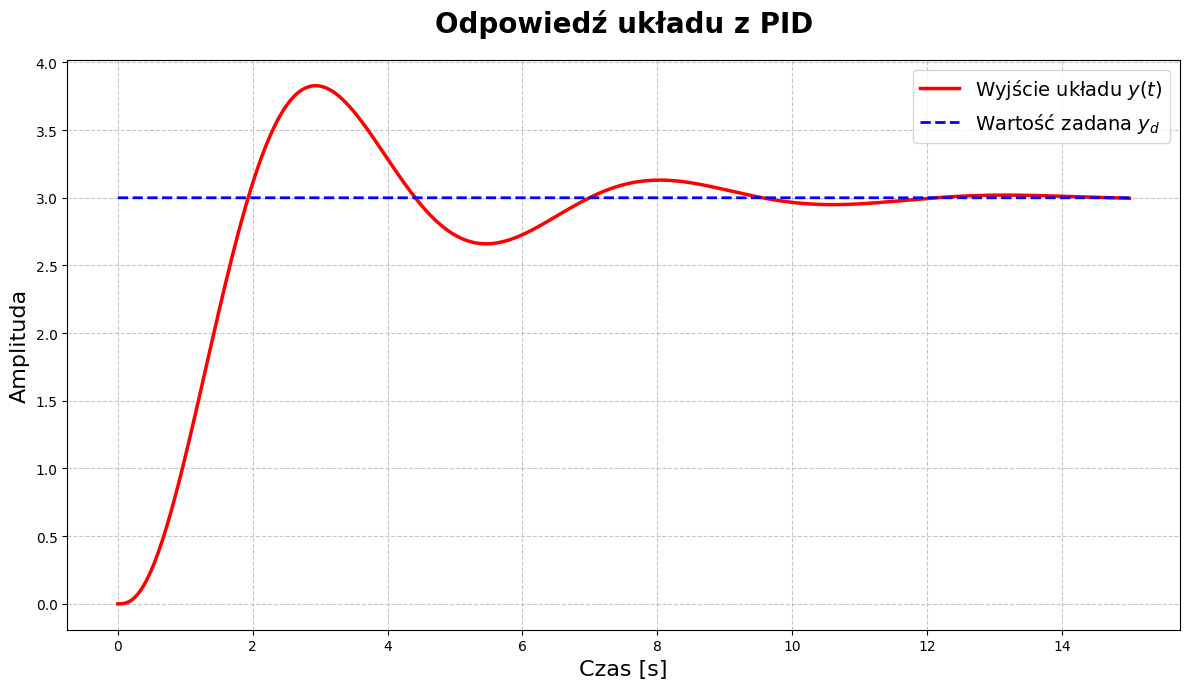

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 1. PARAMETRY UKŁADU
R1 = 2.0
R2 = 5.0
C1 = 0.5
L1 = 2.0
L2 = 0.5

# Macierze układu (zgodnie z Twoim kodem)
A = np.array([
    [-R1/L1, 0, -1/L1], 
    [0, -R2/L2, 1/L2], 
    [1/C1, -1/C1, 0]
])
B = np.array([1/L1, 0, 0]) # Wektor jednowymiarowy dla uproszczenia obliczeń
C_mat = np.array([0, 1, 0]) # Macierz wyjścia

# 2. DEFINICJA MODELU Z PID
def model_pid(x_extended, t, yd, Kp, Ki, Kd):
    """
    x_extended: wektor stanu [x1, x2, x3, error_integral]
    yd: wartość zadana
    Kp, Ki, Kd: nastawy regulatora
    """
    x_sys = x_extended[:3] # Stan obiektu (prądy/napięcia)
    x_int = x_extended[3]  # Całka uchybu (stan regulatora)
    
    y = np.dot(C_mat, x_sys)
    
    e = yd - y
    
    dy_dt = np.dot(C_mat, np.dot(A, x_sys))
    
    u = Kp * e + Ki * x_int - Kd * dy_dt
    dx_dt = np.dot(A, x_sys) + B * u
    d_int_dt = e
    return np.concatenate((dx_dt, [d_int_dt]))

# 3. SYMULACJA
t = np.linspace(0, 15, 10000) # Czas symulacji 10s
x0_extended = [0, 0, 0, 0]  # Warunki początkowe (układ + całka zerowe)
yd = 3.0                    # Wartość zadana

# Przykładowe nastawy (dobrane tak, by pokazać działanie - można zmieniać)
Kp = 5.0
Ki = 8.0
Kd = 2.0
# Kp = 0.01
# Ki = 0.01
# Kd = 0

# Rozwiązanie ODE
sol = odeint(model_pid, x0_extended, t, args=(yd, Kp, Ki, Kd))

# Wyciągnięcie wyjścia y(t) = x2
y_sol = sol[:, 1]
# Wyciągnięcie sterowania (opcjonalnie do analizy)
# u_sol = ... (można przeliczyć po symulacji)

# 4. RYSOWANIE WYKRESU (STYL UŻYTKOWNIKA)
plt.figure(figsize=(12, 7))

# Wyjście układu
plt.plot(t, y_sol, color='red', linewidth=2.5, label='Wyjście układu $y(t)$')

# Wartość zadana
plt.plot(t, [yd]*len(t), color='blue', linestyle='--', linewidth=2.0, label='Wartość zadana $y_d$')

plt.title(f'Odpowiedź układu z PID', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Amplituda', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [88]:
def model_pid(x_extended, t, yd, Kp, Ki, Kd):
    """
    x_extended: wektor stanu [x1, x2, x3, error_integral]
    yd: wartość zadana
    Kp, Ki, Kd: nastawy regulatora
    """
    # Rozpakowanie stanu
    x_sys = x_extended[:3] # Stan obiektu (prądy/napięcia)
    x_int = x_extended[3]  # Całka uchybu (stan regulatora)
    
    # Wyjście układu y(t)
    y = np.dot(C_mat, x_sys)
    
    # Uchyb regulacji
    e = yd - y
    
    # Pochodna wyjścia (potrzebna do czlonu D: de/dt = -dy/dt dla stałego yd)
    # y = C*x => dy/dt = C*dx/dt = C*(Ax + Bu)
    # Ponieważ C*B = 0 (w tym przypadku), dy/dt nie zależy bezpośrednio od u
    # dy/dt = C * A * x
    dy_dt = np.dot(C_mat, np.dot(A, x_sys))
    
    # Prawo sterowania PID: u = Kp*e + Ki*int(e) + Kd*(-dy/dt)
    u = Kp * e + Ki * x_int - Kd * dy_dt
    
    # Ograniczenie sterowania (opcjonalne, ale w praktyce ważne - tu pomijamy lub dajemy duże)
    # u = np.clip(u, -100, 100) 
    
    # Równania stanu obiektu: dx/dt = Ax + Bu
    dx_dt = np.dot(A, x_sys) + B * u
    
    # Równanie członu całkującego: d(int_e)/dt = e
    d_int_dt = e
    
    # Złożenie pochodnych
    return np.concatenate((dx_dt, [d_int_dt]))

Tu = 2.2254397254397253


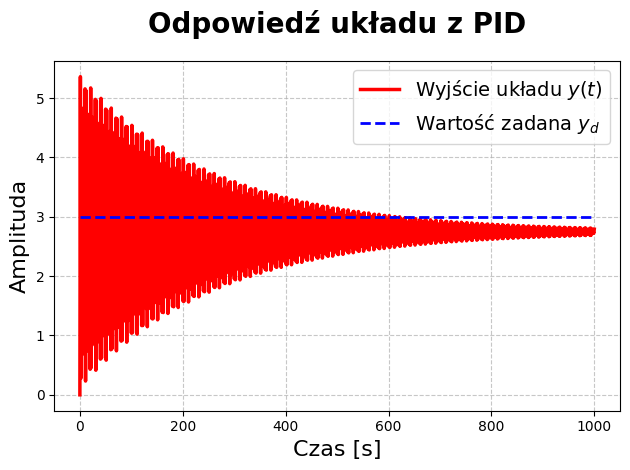

In [87]:
# wzmocnienie graniczne
Kp = 240
Ki = 0
Kd = 0

ku = 242
Tu = 1.8143143143143143

x = np.array([0, 0, 0, 0])
t = np.linspace(0, 1000, 1000)

yd = 3

x_sol = odeint(model_pid, x, t, args=(yd, Kp, Ki, Kd))

y_sol = x_sol[:, 1]

peaks, _ = find_peaks(y_sol)
Tu = np.mean(np.diff(t[peaks]))
print("Tu =", Tu)

plt.plot(t, y_sol, color='red', linewidth=2.5, label='Wyjście układu $y(t)$')

# Wartość zadana
plt.plot(t, [yd]*len(t), color='blue', linestyle='--', linewidth=2.0, label='Wartość zadana $y_d$')

plt.title(f'Odpowiedź układu z PID', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Amplituda', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Szukanie wzmocnienia granicznego...

ZNALEZIONO GRANICĘ STABILNOŚCI!
Wzmocnienie krytyczne Ku = 239.2422
Okres oscylacji Tu     = 1.8220 s


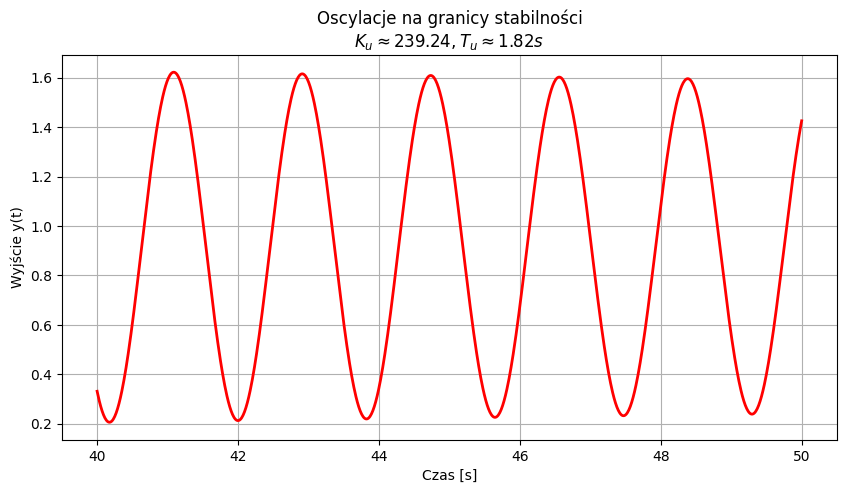

In [114]:
import numpy as np
from scipy.integrate import odeint
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# 1. PARAMETRY UKŁADU
R1, R2 = 2.0, 5.0
C1 = 0.5
L1, L2 = 2.0, 0.5

A = np.array([[-R1/L1, 0, -1/L1], [0, -R2/L2, 1/L1], [1/C1, -1/C1, 0]])
B = np.array([1/L1, 0, 0])
C_mat = np.array([0, 1, 0])

# 2. MODEL
def model_pid(x_extended, t, yd, Kp, Ki, Kd):
    x_sys = x_extended[:3]
    x_int = x_extended[3]
    y = np.dot(C_mat, x_sys)
    e = yd - y
    dy_dt = np.dot(C_mat, np.dot(A, x_sys))
    u = Kp * e + Ki * x_int - Kd * dy_dt
    dx_dt = np.dot(A, x_sys) + B * u
    d_int_dt = e
    return np.concatenate((dx_dt, [d_int_dt]))

# 3. ALGORYTM SZUKANIA K_U (POPRAWIONY)
# Zwiększamy czas do 50s, żeby upewnić się, że złapiemy stabilne oscylacje
t = np.linspace(0, 50, 5000) 
x0 = [0, 0, 0, 0]
yd = 1.0

print("Szukanie wzmocnienia granicznego...")

Kp_test_values = np.linspace(1, 300, 1000)
Ku_found = None
Tu_found = None

for Kp in Kp_test_values:
    sol = odeint(model_pid, x0, t, args=(yd, Kp, 0, 0))
    y = sol[:, 1]
    
    # Analizujemy ostatnie 50% przebiegu (bezpieczniejszy margines)
    tail_len = int(len(y) * 0.5)
    y_tail = y[-tail_len:]
    
    # Znajdujemy szczyty i doliny
    peaks, _ = find_peaks(y_tail)
    valleys, _ = find_peaks(-y_tail)
    
    # --- POPRAWKA: Sprawdzamy czy mamy min. 2 szczyty ORAZ min. 2 doliny ---
    if len(peaks) >= 2 and len(valleys) >= 2:
        # Obliczamy amplitudę dla ostatniego i przedostatniego okresu
        # Amplituda = Szczyt - Dolina (dla danego cyklu)
        # Używamy min(len) aby nie wyjść poza zakres, jeśli liczby szczytów/dolin są różne
        idx = min(len(peaks), len(valleys)) - 1
        
        amp_last = y_tail[peaks[idx]] - y_tail[valleys[idx]]
        amp_prev = y_tail[peaks[idx-1]] - y_tail[valleys[idx-1]]
        
        # Warunek 1: Amplituda jest znacząca (nie jest to szum numeryczny bliski zeru)
        if amp_last > 0.05:
            # Warunek 2: Amplituda jest stała (różnica < 1%) -> GRANICA STABILNOŚCI
            if abs(amp_last - amp_prev) < 0.01 * amp_last:
                Ku_found = Kp
                # Obliczenie Tu ze średniej odległości między szczytami
                peak_times = t[-tail_len:][peaks]
                Tu_found = np.mean(np.diff(peak_times))
                break
            
            # Warunek 3: Jeśli amplituda rośnie drastycznie -> UKŁAD NIESTABILNY
            # Znaleźliśmy Kp nieco za duże, ale to dobre przybliżenie
            if amp_last > amp_prev * 1.05:
                Ku_found = Kp 
                peak_times = t[-tail_len:][peaks]
                Tu_found = np.mean(np.diff(peak_times))
                break

if Ku_found:
    print(f"\nZNALEZIONO GRANICĘ STABILNOŚCI!")
    print(f"Wzmocnienie krytyczne Ku = {Ku_found:.4f}")
    print(f"Okres oscylacji Tu     = {Tu_found:.4f} s")
    
    # Rysowanie
    sol = odeint(model_pid, x0, t, args=(yd, Ku_found, 0, 0))
    y = sol[:, 1]
    
    plt.figure(figsize=(10, 5))
    # Rysujemy tylko fragment, gdzie widać oscylacje (np. ostatnie 10s)
    mask = t > (t[-1] - 10) 
    plt.plot(t[mask], y[mask], 'r', linewidth=2)
    plt.title(f'Oscylacje na granicy stabilności\n$K_u \\approx {Ku_found:.2f}, T_u \\approx {Tu_found:.2f}s$')
    plt.xlabel('Czas [s]')
    plt.ylabel('Wyjście y(t)')
    plt.grid(True)
    plt.show()
else:
    print("Nie znaleziono granicy w badanym zakresie. Zwiększ zakres Kp_test_values.")

--- Wyliczone nastawy (Ku=30.5, Tu=3.14) ---
P  : Kp=15.250, Ki=0.000, Kd=0.000
PI : Kp=13.725, Ki=5.245, Kd=0.000
PD : Kp=24.400, Ki=0.000, Kd=9.577
PID: Kp=18.300, Ki=11.656, Kd=7.183


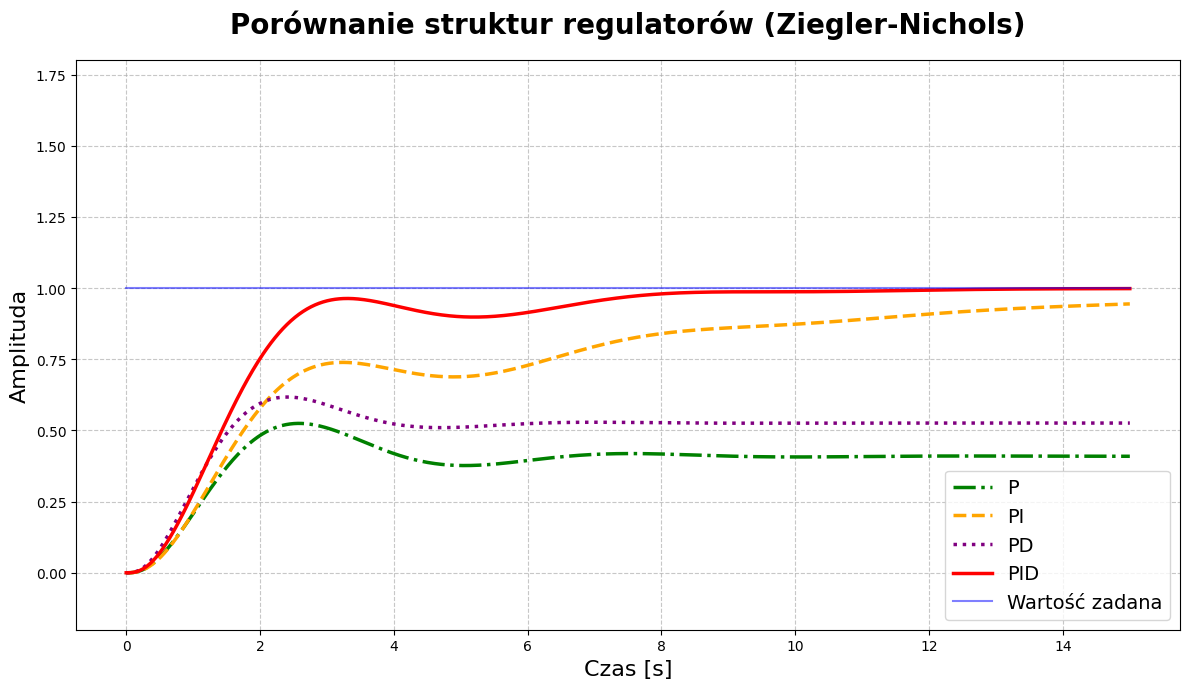

In [117]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- 1. WPISZ SWOJE WARTOŚCI GRANICZNE ---
Ku = 30.5   # Wzmocnienie krytyczne
Tu = 3.14   # Okres krytyczny [s]

# --- 2. OBLICZENIE NASTAW (DLA RÓŻNYCH STRUKTUR INACZEJ) ---
settings = {}

# Regulator P: Kp = 0.5 * Ku
settings['P'] = {
    'Kp': 0.5 * Ku, 
    'Ki': 0, 
    'Kd': 0
}

# Regulator PI: Kp = 0.45 * Ku, Ki = 0.54 * Ku / Tu
settings['PI'] = {
    'Kp': 0.45 * Ku, 
    'Ki': (0.54 * Ku) / Tu, 
    'Kd': 0
}

# Regulator PD: Kp = 0.8 * Ku, Kd = 0.1 * Ku * Tu
settings['PD'] = {
    'Kp': 0.8 * Ku, 
    'Ki': 0, 
    'Kd': 0.1 * Ku * Tu
}

# Regulator PID: Kp = 0.6 * Ku, Ki = 1.2 * Ku / Tu, Kd = 0.075 * Ku * Tu
settings['PID'] = {
    'Kp': 0.6 * Ku, 
    'Ki': (1.2 * Ku) / Tu, 
    'Kd': 0.075 * Ku * Tu
}

# Wyświetlenie wyliczonych wartości w konsoli dla sprawdzenia
print(f"--- Wyliczone nastawy (Ku={Ku}, Tu={Tu}) ---")
for name, val in settings.items():
    print(f"{name:3}: Kp={val['Kp']:.3f}, Ki={val['Ki']:.3f}, Kd={val['Kd']:.3f}")


# --- 3. MODEL OBIEKTU (TEN SAM) ---
R1, R2 = 2.0, 5.0
C1 = 0.5
L1, L2 = 2.0, 0.5
A = np.array([[-R1/L1, 0, -1/L1], [0, -R2/L2, 1/L1], [1/C1, -1/C1, 0]])
B = np.array([1/L1, 0, 0])
C_mat = np.array([0, 1, 0])

def model_pid(x_extended, t, yd, Kp, Ki, Kd):
    x_sys = x_extended[:3]
    x_int = x_extended[3]
    y = np.dot(C_mat, x_sys)
    e = yd - y
    dy_dt = np.dot(C_mat, np.dot(A, x_sys))
    u = Kp * e + Ki * x_int - Kd * dy_dt
    dx_dt = np.dot(A, x_sys) + B * u
    d_int_dt = e
    return np.concatenate((dx_dt, [d_int_dt]))

# --- 4. SYMULACJA PORÓWNAWCZA ---
t = np.linspace(0, 15, 1000)
x0 = [0, 0, 0, 0]
yd = 1.0

plt.figure(figsize=(12, 7))

# Pętla symulująca każdy regulator z jego własnymi nastawami
colors = {'P': 'green', 'PI': 'orange', 'PD': 'purple', 'PID': 'red'}
styles = {'P': '-.', 'PI': '--', 'PD': ':', 'PID': '-'}

for name, gains in settings.items():
    Kp, Ki, Kd = gains['Kp'], gains['Ki'], gains['Kd']
    sol = odeint(model_pid, x0, t, args=(yd, Kp, Ki, Kd))
    y = sol[:, 1]
    
    # Rysowanie
    plt.plot(t, y, label=f'{name}', color=colors[name], linestyle=styles[name], linewidth=2.5)

# Wartość zadana
plt.plot(t, [yd]*len(t), label='Wartość zadana', color='blue', linestyle='-', linewidth=1.5, alpha=0.5)

plt.title('Porównanie struktur regulatorów (Ziegler-Nichols)', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Amplituda', fontsize=16)
plt.legend(fontsize=14, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(-0.2, 1.8)

plt.tight_layout()
plt.show()

Zastosowane nastawy PID:
Kp = 18.3000
Ki = 11.6561
Kd = 7.1828


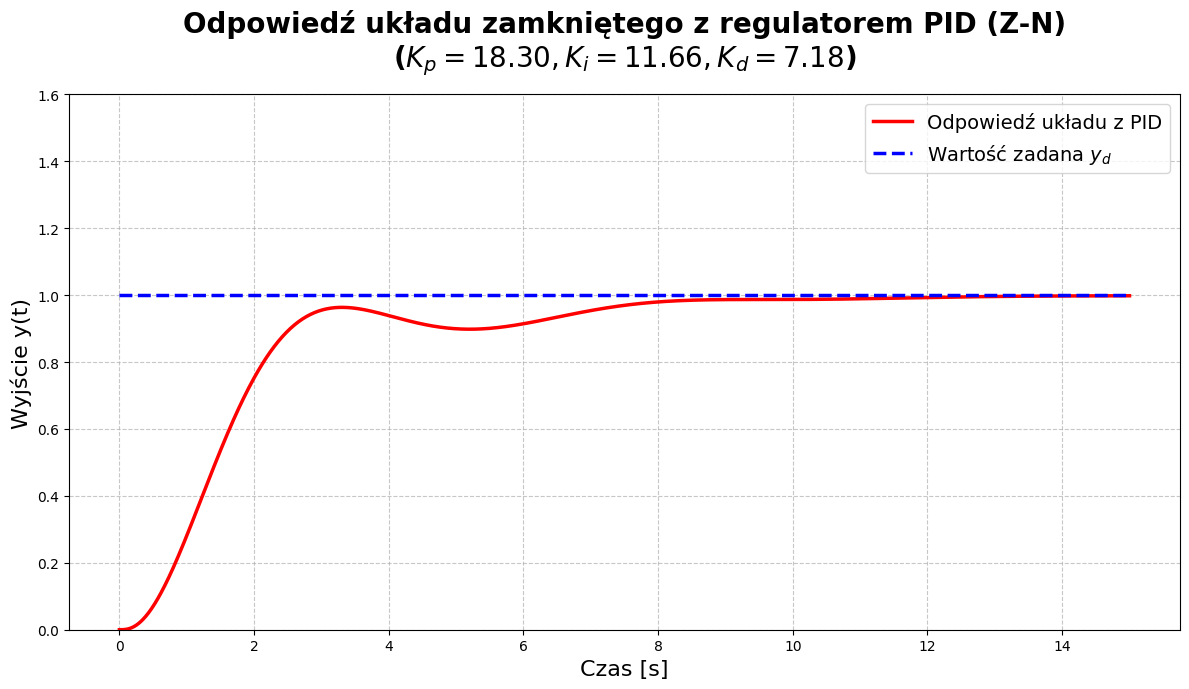

In [118]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- 1. DANE WEJŚCIOWE (z poprzednich kroków) ---
Ku = 30.5   # Wzmocnienie krytyczne
Tu = 3.14   # Okres krytyczny [s]

# --- 2. OBLICZENIE NASTAW PID (Metoda Zieglera-Nicholsa) ---
# Wzory: Kp = 0.6*Ku,  Ki = 1.2*Ku/Tu,  Kd = 0.075*Ku*Tu
Kp = 0.6 * Ku
Ki = (1.2 * Ku) / Tu
Kd = 0.075 * Ku * Tu

print(f"Zastosowane nastawy PID:")
print(f"Kp = {Kp:.4f}")
print(f"Ki = {Ki:.4f}")
print(f"Kd = {Kd:.4f}")

# --- 3. DEFINICJA MODELU ---
R1, R2 = 2.0, 5.0
C1 = 0.5
L1, L2 = 2.0, 0.5

A = np.array([[-R1/L1, 0, -1/L1], [0, -R2/L2, 1/L1], [1/C1, -1/C1, 0]])
B = np.array([1/L1, 0, 0])
C_mat = np.array([0, 1, 0])

def model_pid(x_extended, t, yd, Kp, Ki, Kd):
    x_sys = x_extended[:3]   # Stan obiektu
    x_int = x_extended[3]    # Całka uchybu
    
    y = np.dot(C_mat, x_sys)
    e = yd - y
    
    # Pochodna wyjścia (dla członu D)
    dy_dt = np.dot(C_mat, np.dot(A, x_sys))
    
    # Prawo sterowania PID
    u = Kp * e + Ki * x_int - Kd * dy_dt
    
    dx_dt = np.dot(A, x_sys) + B * u
    d_int_dt = e
    return np.concatenate((dx_dt, [d_int_dt]))

# --- 4. SYMULACJA ---
t = np.linspace(0, 15, 1000)
x0 = [0, 0, 0, 0]
yd = 1.0  # Skok jednostkowy

sol = odeint(model_pid, x0, t, args=(yd, Kp, Ki, Kd))
y = sol[:, 1]

# --- 5. WYKRES (STYL UŻYTKOWNIKA) ---
plt.figure(figsize=(12, 7))

# Wyjście układu
plt.plot(t, y, color='red', linewidth=2.5, label='Odpowiedź układu z PID')

# Wartość zadana
plt.plot(t, [yd]*len(t), color='blue', linestyle='--', linewidth=2.5, label='Wartość zadana $y_d$')

plt.title(f'Odpowiedź układu zamkniętego z regulatorem PID (Z-N)\n($K_p={Kp:.2f}, K_i={Ki:.2f}, K_d={Kd:.2f}$)', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Wyjście y(t)', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1.6) # Skalowanie osi Y dla lepszej widoczności przeregulowania

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# --- 1. MODEL DYNAMIKI Z KRYTERIAMI CAŁKOWYMI (ONLINE) ---
def model_extended(x_state, t, yd, Kp, Ki, Kd, q, r):
    # Rozpakowanie stanu
    # x1, x2, x3: stan obiektu
    # x4: całka uchybu (do regulatora I)
    # x5: ISE (int e^2)
    # x6: ITSE (int t*e^2)
    # x7: IAE (int |e|)
    # x8: ITAE (int t*|e|)
    # x9: IOPT (int q*e^2 + r*u^2)
    
    x_sys = x_state[:3]
    integral = x_state[3]
    
    # Parametry obiektu
    R1, R2 = 2.0, 5.0
    C1 = 0.5
    L1, L2 = 2.0, 0.5
    
    A = np.array([[-R1/L1, 0, -1/L1], [0, -R2/L2, 1/L1], [1/C1, -1/C1, 0]])
    B = np.array([1/L1, 0, 0])
    C_mat = np.array([0, 1, 0])
    
    dy_dt = np.dot(C_mat, np.dot(A, x_sys)) # Pochodna y (dla członu D)
    # Obliczenia pomocnicze
    # Sygnał sterujący PID
    
    y = np.dot(C_mat, x_sys)
    e = yd - y
    u = Kp * e + Ki * integral - Kd * dy_dt

    # Obliczenia kryterium IOPT
    d_iopt = q*(e**2) + r*(u**2)
    
    # Dynamika obiektu
    dx_sys_dt = np.dot(A, x_sys) + B * u
    
    # Dynamika kryteriów (pochodne pod całkami)
    d_int_ctrl = e                 # do regulatora
    d_ise = e**2                   # ISE
    d_itse = t * (e**2)            # ITSE
    d_iae = abs(e)                 # IAE
    d_itae = t * abs(e)            # ITAE
    d_iopt = q*(e**2) + r*(u**2)   # IOPT
    
    # Złożenie wektora pochodnych (spłaszczanie tablic)
    return np.concatenate((dx_sys_dt, [d_int_ctrl], [d_ise], [d_itse], [d_iae], [d_itae], [d_iopt]))

# --- 2. KONFIGURACJA SYMULACJI ---
t = np.linspace(0, 10, 200) # Horyzont 10s
x0 = np.zeros(9)            # 9 zmiennych stanu (3 obiekt + 1 reg + 5 wskaźników)
yd = 1.0                    # Skok jednostkowy

# Wartości ZN z poprzedniego zadania
Ku = 30.5
Tu = 3.14
Kp_zn = 0.6 * Ku
Ki_zn = 1.2 * Ku / Tu
Kd_zn = 0.075 * Ku * Tu

# --- 3. OPTYMALIZACJA (DOBIERANIE EMPIRYCZNE) ---

# Funkcja celu dla optymalizatora (zwraca końcową wartość wybranego wskaźnika)
def objective_function(params, criteria_idx, q=1, r=1):
    Kp, Ki, Kd = params
    if Kp < 0 or Ki < 0 or Kd < 0: return 1e9 # Kara za ujemne nastawy
    
    sol = odeint(model_extended, x0, t, args=(yd, Kp, Ki, Kd, q, r))
    return sol[-1, criteria_idx] # Zwraca wartość całki na końcu czasu

print("Trwa optymalizacja nastaw (może potrwać kilka sekund)...")

# A) Optymalizacja pod ISE (indeks 4 w wektorze stanu x_sol, czyli x5 w modelu)
# Startujemy z nastaw ZN
res_ise = minimize(objective_function, [Kp_zn, Ki_zn, Kd_zn], args=(4, 1, 1), method='Nelder-Mead')
Kp_ise, Ki_ise, Kd_ise = res_ise.x

# B) Optymalizacja pod IOPT (q=1, r=1) (indeks 8)
res_opt1 = minimize(objective_function, [Kp_zn, Ki_zn, Kd_zn], args=(8, 1, 1), method='Nelder-Mead')
Kp_opt1, Ki_opt1, Kd_opt1 = res_opt1.x

# C) Optymalizacja pod IOPT (q=1, r=0.01) (indeks 8)
# Startujemy z agresywniejszych nastaw, bo małe r pozwala na duże sterowanie
res_opt2 = minimize(objective_function, [Kp_ise, Ki_ise, Kd_ise], args=(8, 1, 0.01), method='Nelder-Mead')
Kp_opt2, Ki_opt2, Kd_opt2 = res_opt2.x

# --- 4. SYMULACJE KOŃCOWE ---
sol_zn   = odeint(model_extended, x0, t, args=(yd, Kp_zn, Ki_zn, Kd_zn, 1, 1))
sol_ise  = odeint(model_extended, x0, t, args=(yd, Kp_ise, Ki_ise, Kd_ise, 1, 1))
sol_opt1 = odeint(model_extended, x0, t, args=(yd, Kp_opt1, Ki_opt1, Kd_opt1, 1, 1)) # r=1
sol_opt2 = odeint(model_extended, x0, t, args=(yd, Kp_opt2, Ki_opt2, Kd_opt2, 1, 0.01)) # r=0.01

# --- 5. PREZENTACJA WYNIKÓW ---

print("\n--- WYNIKI LICZBOWE (Wartości wskaźników) ---")
print(f"{'Metoda':<20} | {'Kp':<7} {'Ki':<7} {'Kd':<7} | {'ISE':<8} {'IOPT':<8}")
print("-" * 65)
print(f"{'Ziegler-Nichols':<20} | {Kp_zn:<7.1f} {Ki_zn:<7.1f} {Kd_zn:<7.1f} | {sol_zn[-1, 4]:<8.4f} {sol_zn[-1, 8]:<8.4f}")
print(f"{'Min. ISE':<20} | {Kp_ise:<7.1f} {Ki_ise:<7.1f} {Kd_ise:<7.1f} | {sol_ise[-1, 4]:<8.4f} {'-':<8}")
print(f"{'Min. IOPT (r=1)':<20} | {Kp_opt1:<7.1f} {Ki_opt1:<7.1f} {Kd_opt1:<7.1f} | {'-':<8} {sol_opt1[-1, 8]:<8.4f}")
print(f"{'Min. IOPT (r=0.01)':<20}| {Kp_opt2:<7.1f} {Ki_opt2:<7.1f} {Kd_opt2:<7.1f} | {'-':<8} {sol_opt2[-1, 8]:<8.4f} (dla r=0.01)")

# Wykres
plt.figure(figsize=(12, 7))
plt.plot(t, sol_zn[:, 1],   'b-',  linewidth=2, label='Ziegler-Nichols')
plt.plot(t, sol_ise[:, 1],  'r--', linewidth=2, label='Min. ISE (Najszybszy)')
plt.plot(t, sol_opt1[:, 1], 'g:',  linewidth=3, label='Min. IOPT (r=1, Oszczędny)')
plt.plot(t, sol_opt2[:, 1], 'm-.', linewidth=2, label='Min. IOPT (r=0.01, Agresywny)')
plt.plot(t, [yd]*len(t), 'k--', alpha=0.3, label='Cel')

plt.title('Porównanie odpowiedzi dla różnych kryteriów optymalizacji', fontsize=18, fontweight='bold')
plt.xlabel('Czas [s]', fontsize=14)
plt.ylabel('Wyjście y(t)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Trwa optymalizacja nastaw (może potrwać kilka sekund)...


/tmp/ipython-input-340595307.py:70: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(model_extended, x0, t, args=(yd, Kp, Ki, Kd, q, r))


: 

Nazwa nastaw                        | ISE      | ITAE     | Koszt (r=1)  | Koszt (r=0.01)
------------------------------------------------------------------------------------------
Ziegler-Nichols                     | 1.1117   | 3.3700   | 4142.4496    | 42.5251     
Szybki (Min ISE)                    | 0.7117   | 2.2469   | 5776.9423    | 58.4740     
Oszczędny (Min IOPT)                | 4.1292   | 26.0145  | 1067.9123    | 14.7670     


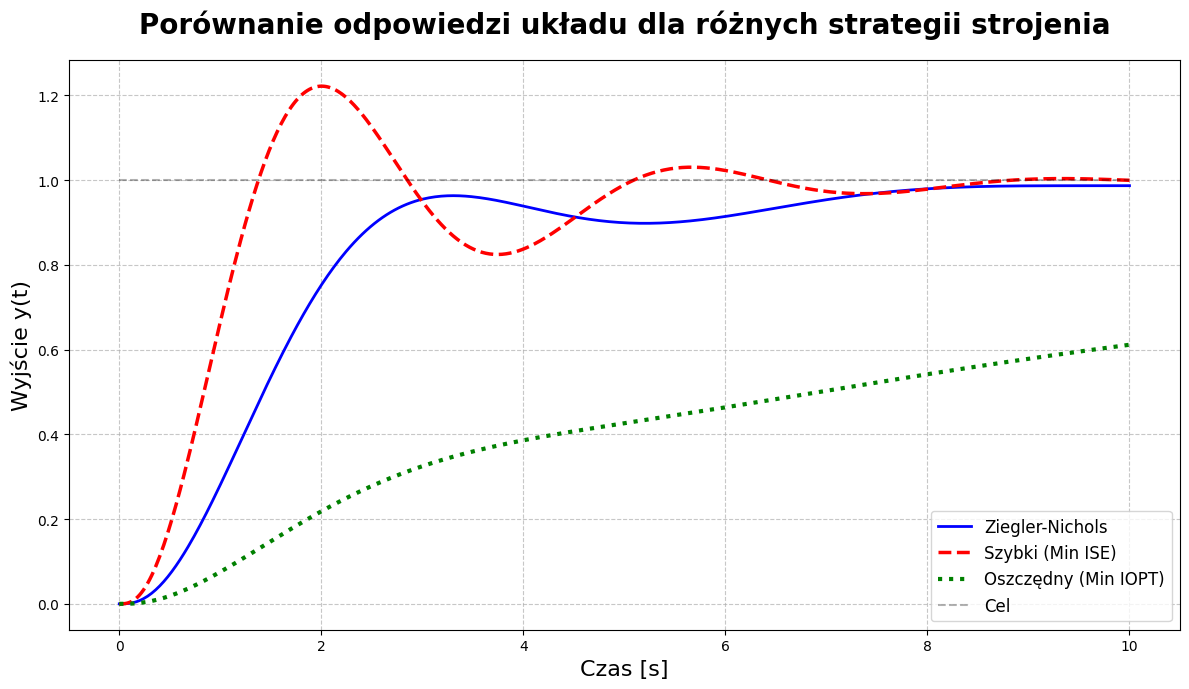

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- 1. MODEL ANALITYCZNY (Liczy wszystkie wskaźniki naraz) ---
def model_analysis(x_state, t, yd, Kp, Ki, Kd):
    # x_state:
    # [0-2]: stan obiektu
    # [3]:   całka uchybu (dla regulatora)
    # [4]:   ISE (int e^2)
    # [5]:   ITAE (int t*|e|)
    # [6]:   IOPT_DROGI (int e^2 + 1.0*u^2)  <- Koszt przy r=1
    # [7]:   IOPT_TANI  (int e^2 + 0.01*u^2) <- Koszt przy r=0.01
    
    x_sys = x_state[:3]
    integral_control = x_state[3]
    
    # Parametry obiektu
    R1, R2 = 2.0, 5.0
    C1 = 0.5
    L1, L2 = 2.0, 0.5
    
    A = np.array([[-R1/L1, 0, -1/L1], [0, -R2/L2, 1/L1], [1/C1, -1/C1, 0]])
    B = np.array([1/L1, 0, 0])
    C_mat = np.array([0, 1, 0])
    
    # Obliczenia
    y = np.dot(C_mat, x_sys)
    e = yd - y
    dy_dt = np.dot(C_mat, np.dot(A, x_sys))
    
    # Sterowanie PID
    u = Kp * e + Ki * integral_control - Kd * dy_dt
    
    # Dynamika obiektu
    dx_sys_dt = np.dot(A, x_sys) + B * u
    d_int_ctrl = e
    
    # --- METRYKI (Liczymy wszystko niezależnie od nastaw) ---
    d_ise  = e**2
    d_itae = t * abs(e)
    d_iopt_expensive = (e**2) + 1.0 * (u**2)   # Jeśli r=1
    d_iopt_cheap     = (e**2) + 0.01 * (u**2)  # Jeśli r=0.01
    
    return np.concatenate((dx_sys_dt, [d_int_ctrl], [d_ise], [d_itae], [d_iopt_expensive], [d_iopt_cheap]))

# --- 2. PARAMETRY ---
t = np.linspace(0, 10, 500)
yd = 1.0
x0 = np.zeros(8) # 3 stan + 1 reg + 4 wskaźniki

# Parametry graniczne
Ku = 30.5
Tu = 3.14

# --- 3. PRZYPADKI DO SYMULACJI ---

cases = [
    {
        'label': 'Ziegler-Nichols',
        'Kp': 0.6 * Ku,
        'Ki': 1.2 * Ku / Tu,
        'Kd': 0.075 * Ku * Tu,
        'style': 'b-', 'lw': 2
    },
    {
        'label': 'Szybki (Min ISE)',
        'Kp': 50.0,
        'Ki': 25.0,
        'Kd': 10.0,
        'style': 'r--', 'lw': 2.5
    },
    {
        'label': 'Oszczędny (Min IOPT)',
        'Kp': 5.0,
        'Ki': 2.0,
        'Kd': 5.0,
        'style': 'g:', 'lw': 3
    }
]

# --- 4. WYKONANIE I TABELA WYNIKÓW ---
plt.figure(figsize=(12, 7))

print(f"{'Nazwa nastaw':<35} | {'ISE':<8} | {'ITAE':<8} | {'Koszt (r=1)':<12} | {'Koszt (r=0.01)':<12}")
print("-" * 90)

for case in cases:
    # Symulacja
    sol = odeint(model_analysis, x0, t, args=(yd, case['Kp'], case['Ki'], case['Kd']))
    y = sol[:, 1]
    
    # Pobranie wyników całek (ostatni wiersz)
    ise_val = sol[-1, 4]
    itae_val = sol[-1, 5]
    cost_expensive = sol[-1, 6] # IOPT dla r=1
    cost_cheap = sol[-1, 7]     # IOPT dla r=0.01
    
    # Wyświetlanie w tabeli
    print(f"{case['label']:<35} | {ise_val:<8.4f} | {itae_val:<8.4f} | {cost_expensive:<12.4f} | {cost_cheap:<12.4f}")
    
    # Rysowanie
    plt.plot(t, y, case['style'], linewidth=case['lw'], label=case['label'])

# --- 5. WYKRES ---
plt.plot(t, [yd]*len(t), 'k--', alpha=0.3, label='Cel')
plt.title('Porównanie odpowiedzi układu dla różnych strategii strojenia', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Wyjście y(t)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()